# Pymaceuticals Inc.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Munging

In [3]:
trial = pd.read_csv('clinicaltrial_data.csv')
mice = pd.read_csv('mouse_drug_data.csv')
combined = trial.merge(mice, how='outer')
print(combined.Drug.unique())
combined.head(20)

['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Propriva' 'Zoniferol' 'Placebo' 'Ceftamin']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Volume Over Time

In [4]:
timepoints = combined.Timepoint.unique()
drugs = combined.Drug.unique()

tumor_volume = pd.DataFrame(index = timepoints, columns = drugs)
for drug in drugs:
        tumor_volume[drug] = [combined[(combined["Drug"] == drug) & (combined["Timepoint"] == time)]['Tumor Volume (mm3)'].mean() for time in timepoints]

tumor_volume.index.name = 'Timepoints'
tumor_volume.columns.name = 'Drugs'
tumor_volume.head(10)

Drugs,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoints,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.389175,46.796098,47.062001,47.527452,43.944859,47.248967,46.851818,47.125589,46.503051
10,43.084291,49.582269,48.694210,49.403909,49.463844,42.531957,49.101541,48.689881,49.423329,48.285125
15,42.064317,52.399974,50.933018,51.296397,51.529409,41.495061,51.067318,50.779059,51.359742,50.094055
20,40.716325,54.920935,53.644087,53.197691,54.067395,40.238325,53.346737,53.170334,54.364417,52.157049
25,39.939528,57.678982,56.731968,55.715252,56.166123,38.974300,55.504138,55.432935,57.482574,54.287674
30,38.769339,60.994507,59.559509,58.299397,59.826738,38.703137,58.196374,57.713531,59.809063,56.769517
35,37.816839,63.371686,62.685087,60.742461,62.440699,37.451996,60.350199,60.089372,62.420615,58.827548
40,36.958001,66.068580,65.600754,63.162824,65.356386,36.574081,63.045537,62.916692,65.052675,61.467895


Text(0,0.5,'Total Tumor Volume (mm**3)')

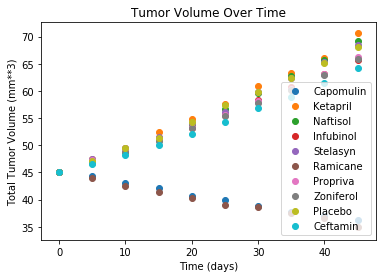

In [42]:
 for drug in tumor_volume.columns.values:
     plt.scatter(tumor_volume.index.values, tumor_volume[drug])
    
plt.legend(tumor_volume.columns.values)
plt.title("Tumor Volume Over Time")
plt.xlabel('Time (days)')
plt.ylabel('Total Tumor Volume (mm**3)')

## Metastatic Sites Over Time

In [5]:
metastatic_sites = pd.DataFrame(index = timepoints, columns = drugs)
for drug in drugs:
    metastatic_sites[drug] = [combined[(combined["Drug"] == drug) & (combined["Timepoint"] == time)]['Metastatic Sites'].mean() for time in timepoints]

metastatic_sites.index.name = 'Timepoints'
metastatic_sites.columns.name = 'Drugs'    
metastatic_sites.head(10)

Drugs,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoints,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.304348,0.260870,0.280000,0.240000,0.120000,0.320000,0.166667,0.375000,0.380952
10,0.320000,0.590909,0.523810,0.666667,0.478261,0.250000,0.565217,0.500000,0.833333,0.600000
15,0.375000,0.842105,0.857143,0.904762,0.782609,0.333333,0.764706,0.809524,1.250000,0.789474
20,0.652174,1.210526,1.150000,1.050000,0.952381,0.347826,1.000000,1.294118,1.526316,1.111111
25,0.818182,1.631579,1.500000,1.277778,1.157895,0.652174,1.357143,1.687500,1.941176,1.500000
30,1.090909,2.055556,2.066667,1.588235,1.388889,0.782609,1.615385,1.933333,2.266667,1.937500
35,1.181818,2.294118,2.266667,1.666667,1.562500,0.952381,2.300000,2.285714,2.642857,2.071429
40,1.380952,2.733333,2.466667,2.100000,1.583333,1.100000,2.777778,2.785714,3.166667,2.357143


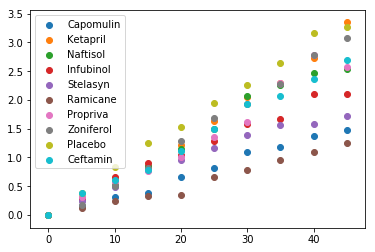

In [37]:
 for drug in metastatic_sites.columns.values:
     plt.scatter(metastatic_sites.index.values, metastatic_sites[drug])
    
plt.legend(metastatic_sites.columns.values)

## Survival Rate

In [6]:
survival = pd.DataFrame(index = timepoints, columns = drugs)
for drug in drugs:
    survival[drug] = [combined[(combined["Drug"] == drug) & (combined["Timepoint"] == time)]['Mouse ID'].count() for time in timepoints]

survival.index.name = 'Timepoints'
survival.columns.name = 'Drugs'    
survival.head(10)

Drugs,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoints,,,,,,,,,,
0,25,25,25,25,26,25,26,25,25,25
5,25,23,23,25,25,25,25,24,24,21
10,25,22,21,21,23,24,23,22,24,20
15,24,19,21,21,23,24,17,21,20,19
20,23,19,20,20,21,23,17,17,19,18
25,22,19,18,18,19,23,14,16,17,18
30,22,18,15,17,18,23,13,15,15,16
35,22,17,15,12,16,21,10,14,14,14
40,21,15,15,10,12,20,9,14,12,14


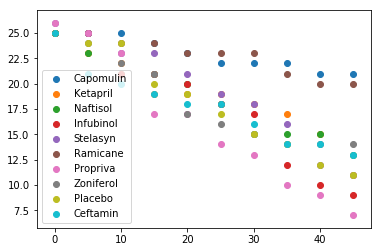

In [39]:
 for drug in survival.columns.values:
     plt.scatter(survival.index.values, survival[drug])
    
plt.legend(survival.columns.values)

## Percentage Tumor Volume Change Per Drug